In [ ]:
import pandas as pd
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
import itertools
import scipy.stats

In [ ]:
df = pd.read_csv("dataset/timeseries/MSFT_timeseries.csv")[["Date"]]
df["Date"]=df["Date"].str[0:10]
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

In [ ]:

directory = "dataset/timeseriesfinal/"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        name = re.search(r'/(.*?)_', f).group(1).split('/')[1]
        print(name)
        temp_df = pd.read_csv(f)[["Date","Close"]]
        temp_df["Date"]=temp_df["Date"].str[0:10]
        temp_df["Date"] = pd.to_datetime(temp_df["Date"])
        df = pd.merge(df, temp_df, on="Date", how="inner")
        df=df.rename(columns={"Close":name})
        #print(len(temp_df))
        del temp_df

In [ ]:
df["Date"] = pd.to_datetime(df["Date"]).dt.date

In [ ]:
df

In [ ]:
df.to_csv("final_dataset.csv")

In [ ]:
sns.set_theme(style="darkgrid")

/tmp/ipykernel_7387/170846238.py:3: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  ax=sns.lineplot(x='Date', y='value', hue='variable',


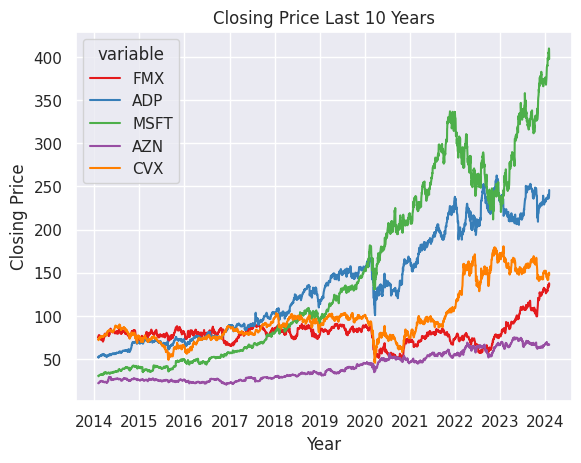

In [154]:
df_plot=df[["Date","FMX","ADP","MSFT","AZN","CVX"]]

ax=sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(df_plot, ['Date']),
             palette=sns.color_palette("Set1"))

ax.set(xlabel='Year',
       ylabel='Closing Price',
       title='Closing Price Last 10 Years')

plt.show()


In [ ]:
# Build a list of unique pairs
col = list(filter(lambda x: x != 'Date', df.columns))

pairs=list(itertools.combinations(col, 2))
pairs

In [ ]:
for pair in pairs:
    start_date=df["Date"].min()
    delta = datetime.timedelta(days=100)

    temp_df = df[["Date",pair[0],pair[1]]]
    name = pair[0] + '_' + pair[1]
    print(name)
    del temp_df


In [ ]:
final_df = pd.DataFrame()
for pair in pairs:
    name = pair[0] + '_' + pair[1]
    start_index=0
    end_index=100
    temp_df = df[["Date",pair[0],pair[1]]]
    temp_list=[]

    while(start_index<2516):
        temp_df2=temp_df.iloc[start_index:end_index]
        start_index=end_index
        end_index+=100
        #print(start_index)
        cor=scipy.stats.pearsonr(temp_df2[pair[0]],temp_df2[pair[1]])[0]
        #print(cor)
        temp_list.append(cor)
        del temp_df2

    #final_df = final_df.assign(name=temp_list)
    final_df[name] = temp_list
    del temp_df
    del temp_list

In [139]:
final_df.to_csv("final_corr.csv")

/tmp/ipykernel_7387/3445429916.py:3: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  ax=sns.lineplot(x='Date', y='value', hue='variable',


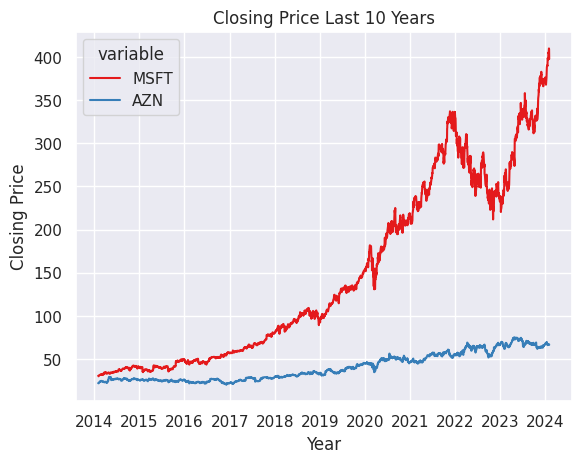

In [141]:
df_plot=df[["Date","MSFT","AZN"]]

ax=sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(df_plot, ['Date']),
             palette=sns.color_palette("Set1"))

ax.set(xlabel='Year',
       ylabel='Closing Price',
       title='Closing Price Last 10 Years')

plt.show()


/tmp/ipykernel_7387/3436411386.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.lineplot(data=final_df["MSFT_AZN"],palette=sns.color_palette("Set1"))


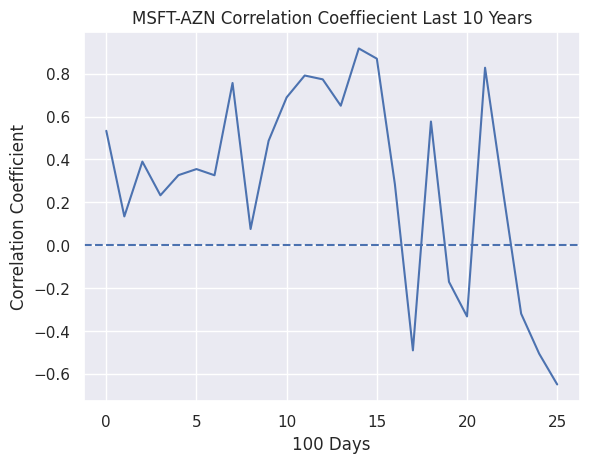

In [157]:
ax=sns.lineplot(data=final_df["MSFT_AZN"],palette=sns.color_palette("Set1"))

ax.set(xlabel='100 Days',
       ylabel='Correlation Coefficient',
       title='MSFT-AZN Correlation Coeffiecient Last 10 Years')

ax.axhline(0, ls='--')

plt.show()


In [150]:
final_df["MSFT_AZN"]

0     0.533319
1     0.133987
2     0.389637
3     0.232494
4     0.326423
5     0.354819
6     0.325922
7     0.756355
8     0.075333
9     0.486846
10    0.689342
11    0.791273
12    0.773399
13    0.650393
14    0.917515
15    0.869872
16    0.284567
17   -0.490889
18    0.576610
19   -0.171189
20   -0.332538
21    0.827608
22    0.249633
23   -0.319557
24   -0.506308
25   -0.649848
Name: MSFT_AZN, dtype: float64